<h3 style="text-align: center;">Lab 05: Matplotlib Seaborn Plotly</h3>

- This lab covers the Arcpy, including topics such as SearchCursor, UpdateCursor and InsertCursor. 

- There are four questions in total. Please provide your code answers directly below each question.

- Make sure to run all cells so that the answers are stored. Once completed, submit the file (**ensuring that all answers are included**) to Canvas by **midnight (11:29 PM) on October 06**.

- This lab is worth a total of **65 points** and contributes **6.5%** toward the final grade.

- The data for this lab is: Parking.csv

In [3]:
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt

notebook_path = Path(os.path.abspath("__file__")).parent
os.chdir(notebook_path)
os.getcwd()

'f:\\Clark_Universiy\\Clark_Teaching\\Git_Repo\\ssj-302\\docs\\Labs\\Lab05'

### 1. Create a line plot using Matplotlib or Seaborn to visualize the top ten streets with the highest number of parking meters

In [7]:
sample_parkings = pd.read_csv('Parking.csv')

In [8]:
sample_parkings.head(5)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,X,Y,OBJECTID,METER_ID,VENDOR,PAY_POLICY,PRE_PAY,...,HOUSING_MANUFACTURER,SIDEWALKGE,COIN_SLOTLE,METER_CONDITION,PERMIT_RATE,INSTALLED_ON,PURCHASED_DATE,METER_STATE,SPACE_STATE,text
0,1860,1522,3662,769662.8645,2954100.439,3663,NaN,IPS,08:00AM-06:00PM MON-SAT $0.25 120,NaN,...,NaN,NaN,NaN,NaN,NaN,4/1/2017 1:00,NaN,ACTIVE,ACTIVE,STREET:BEACON ST\nMETER_TYPE：SINGLE-SPACE
1,353,1610,5666,771415.4496,2947029.034,5667,NaN,IPS,08:00AM-06:00PM MON-SAT $0.25 120,NaN,...,NaN,NaN,NaN,NaN,NaN,4/1/2017 1:00,NaN,ACTIVE,ACTIVE,STREET:MASSACHUSETTS AV\nMETER_TYPE：SINGLE-SPACE
2,1333,568,1789,774192.9686,2953085.293,1790,NaN,IPS,08:00AM-08:00PM MON-SAT $0.25 120,NaN,...,NaN,NaN,NaN,NaN,NaN,4/1/2017 1:00,NaN,ACTIVE,ACTIVE,STREET:WASHINGTON ST\nMETER_TYPE：SINGLE-SPACE
3,905,1801,6239,765800.3561,2952819.371,6240,NaN,IPS,08:00AM-06:00PM MON-SAT $0.25 120,NaN,...,NaN,NaN,NaN,NaN,NaN,4/1/2017 1:00,NaN,ACTIVE,ACTIVE,STREET:BAY STATE RD\nMETER_TYPE：SINGLE-SPACE
4,1289,90,852,776448.2426,2961991.215,853,NaN,IPS,08:00AM-08:00PM MON-SAT $0.25 120,NaN,...,NaN,NaN,NaN,NaN,NaN,4/1/2017 1:00,NaN,ACTIVE,ACTIVE,STREET:SIXTH STREET\nMETER_TYPE：SINGLE-SPACE


In [9]:
rst = sample_parkings['STREET'].value_counts(ascending=False).head(10)
rst

COMMONWEALTH AV    201
BEACON ST          135
TREMONT ST          70
WASHINGTON ST       61
HARRISON AV         59
CHARLES ST          55
D STREET            49
BERKELEY ST         47
HUNTINGTON AV       44
SUMMER ST           42
Name: STREET, dtype: int64

Text(0.5, 1.0, 'The number of parking meter on Street')

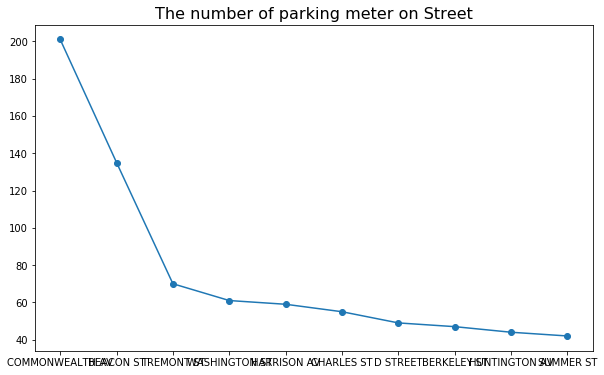

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(rst.index, rst.values, marker='o', linestyle='-')
plt.title("The number of parking meter on Street", fontsize=16)

### 2. Develop an interactive bar chart that displays the top ten streets with the highest number of parking meters.

In [7]:
import plotly.express as px
fig = px.bar(x=rst.index, y=rst.values, labels={'x': 'Street', 'y': 'Parking meters'},title='Parking meters')
fig.show()

### 3. Create a map to show the location of parking meters (25 points)
- The map should focus on Boston area
- The pop-up information show: Street and METER_TYPE

In [11]:
import plotly.graph_objects as go
sample_parkings['text'] = 'STREET:' + sample_parkings['STREET'] + 'METER_TYPE：' + sample_parkings['METER_TYPE']

In [1]:
fig = go.Figure(data=go.Scattergeo(
        lon = sample_parkings['LONGITUDE'],
        lat = sample_parkings['LATITUDE'],
        text = sample_parkings['text'],
        mode = 'markers'))

fig.update_layout(
        title = 'Parking meter',
        geo = dict(
            scope = 'MA',
            center=dict(lat=42.3601, lon=-71.0589),
            projection_scale=80
        ),
        width=1000,  # Set figure width
        height=600   # Set figure height
    )
fig.show()

NameError: name 'go' is not defined